# Prediction of Staining
This notebook can be used to predict images with existing models and plot the output, compare it to the target images, plot histograms etc.

In [22]:
import os
import os.path
import numpy as np
import glob
import matplotlib.pyplot as plt
import preprocessing_functions as pre
import training_functions as training
import skimage.io
import prediction as pred
import keras

Load d0-images you want to convert and the d1 and d2 images for comaprison.

In [14]:
# define directories
wrk_dir = r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining"
image_folder = 'Val_Images'
im_dir = os.path.join(wrk_dir, image_folder, '*.png')
imd0_dir = os.path.join(wrk_dir, image_folder, '*d0.png')

In [17]:
#load images
d0_images = glob.glob(imd0_dir)
d0_stack = pre.stack_images(d0_images, num_channels = 1)
images = glob.glob(im_dir)
d12_images =  [x for x in images if x not in d0_images]
d12_stack= pre.stack_images(d12_images, num_channels = 2)

In [18]:
# normalize images
(d0_norm, mean, std) = pre.norm_batch(d0_stack)
d12_norm = pre.norm(d12_stack, mean, std)

Plot images and histograms if intrested.

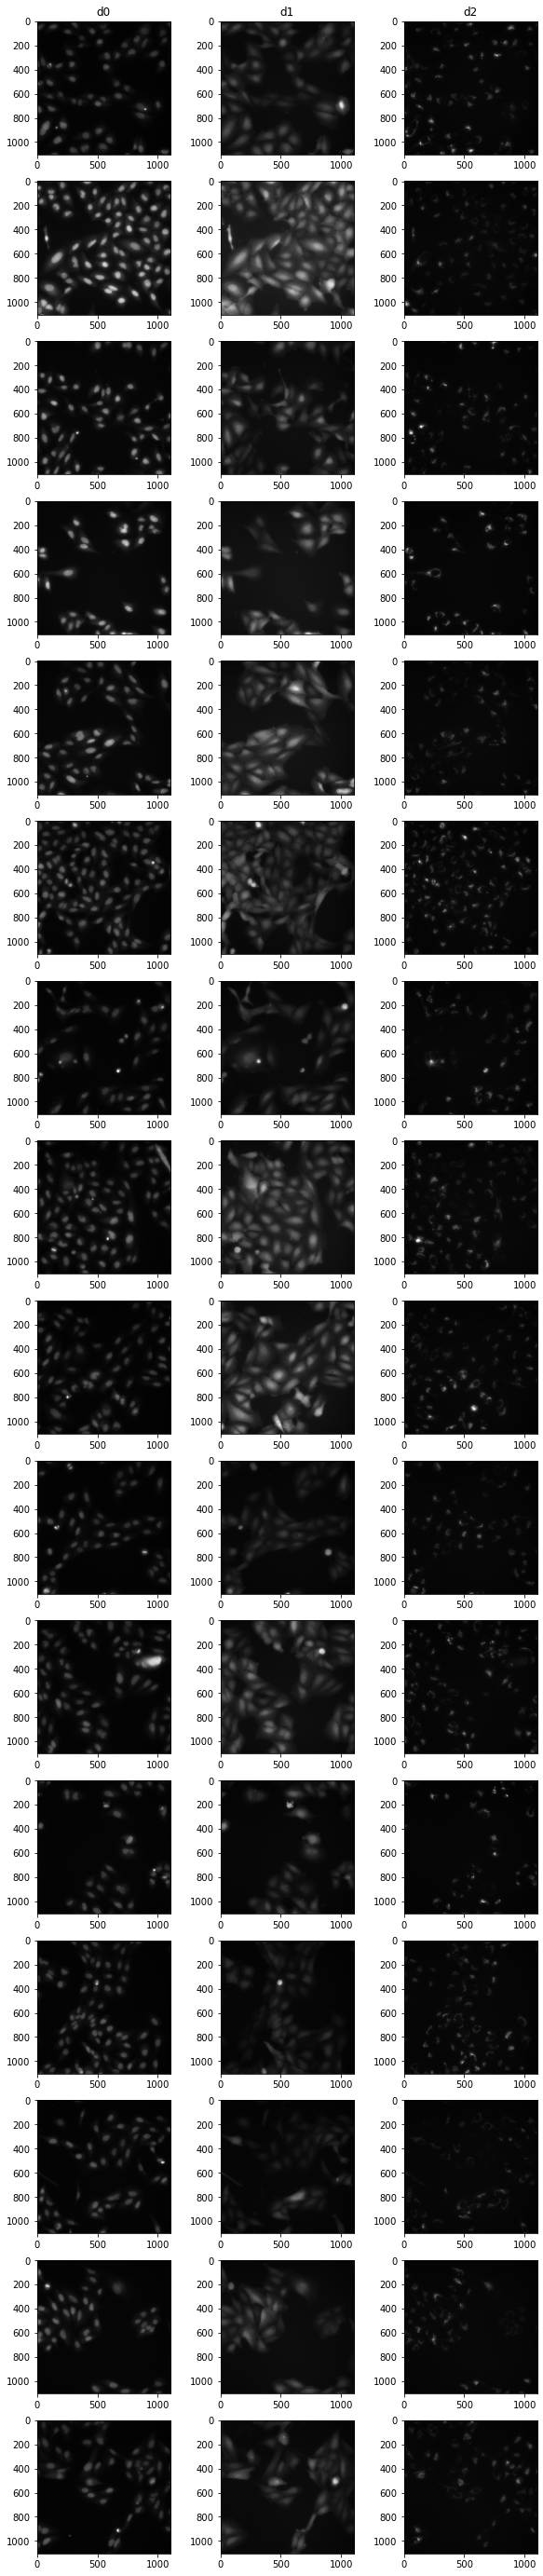

In [74]:
# plot images
plt.figure(figsize=(10,50)) 
n = d0_stack.shape[0]
for p in range(n):
    plt.subplot(n,3,1+3*p)    
    plt.imshow(d0_stack[p], cmap='gray')
    if p == 0:
        plt.title('d0')

    plt.subplot(n,3,2+3*p)    
    plt.imshow(d12_stack[p,:,:,0], cmap='gray')
    if p == 0:
        plt.title('d1')
    
    plt.subplot(n,3,3+3*p)    
    plt.imshow(d12_stack[p,:,:,1], cmap='gray')
    if p == 0:
        plt.title('d2')

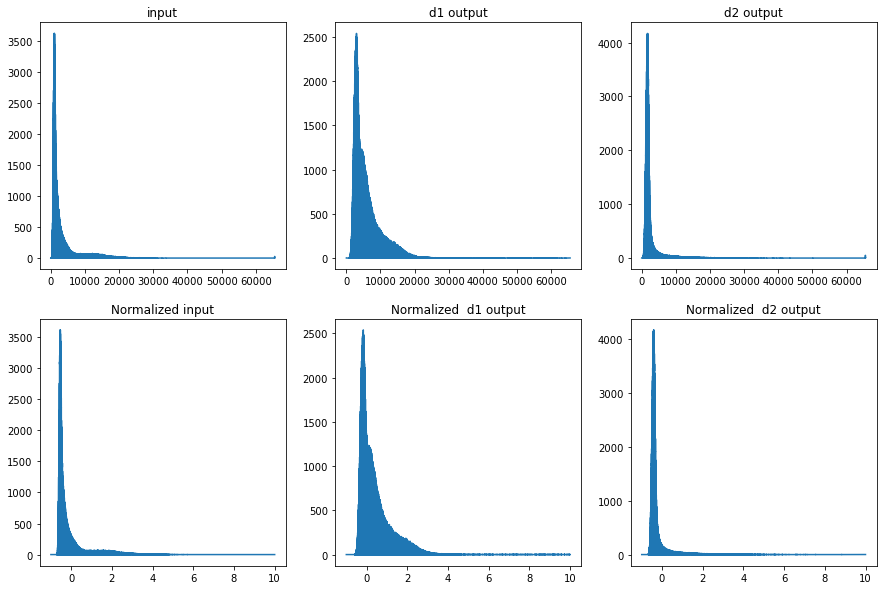

In [61]:
# plot histograms
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
histogram, bin_edges = np.histogram(d0_stack[0], bins=65535, range=(0,65535))
plt.plot(bin_edges[0:-1], histogram)  
plt.title("input")

plt.subplot(2,3,2)
histogram, bin_edges = np.histogram(d12_stack[0,:,:,0], bins=65535, range=(0,65535))
plt.plot(bin_edges[0:-1], histogram)  
plt.title("d1 output")

plt.subplot(2,3,3)
histogram, bin_edges = np.histogram(d12_stack[0,:,:,1], bins=65535, range=(0,65535))
plt.plot(bin_edges[0:-1], histogram)  
plt.title("d2 output")

plt.subplot(2,3,4)
histogram, bin_edges = np.histogram(d0_norm[0], bins=65535, range=(-1,10))
plt.plot(bin_edges[0:-1], histogram)  
plt.title("Normalized input")

plt.subplot(2,3,5)
histogram, bin_edges = np.histogram(d12_norm[0,:,:,0], bins=65535, range=(-1,10))
plt.plot(bin_edges[0:-1], histogram)  
plt.title("Normalized  d1 output")

plt.subplot(2,3,6)
histogram, bin_edges = np.histogram(d12_norm[0,:,:,1], bins=65535, range=(-1,10))
plt.plot(bin_edges[0:-1], histogram)  
plt.title("Normalized  d2 output")

plt.show()

Load desired model and convert images

In [29]:
model_name = 'd1d2_56im'
mdl_dir = r'..\models'
model = keras.models.load_model(os.path.join(mdl_dir,model_name))

In [68]:
num_im = d0_norm.shape[0]
out =[]
for n in range(num_im):
    image = d0_norm[n]
    output = pred.predict(model, image, 128, 128, num_outputs=2)
    output_norm = pre.unnormalize(output, mean, std)
    out.append(output)
out = np.stack(out, axis = 0)

(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)


Plot predicted images and histograms of output.

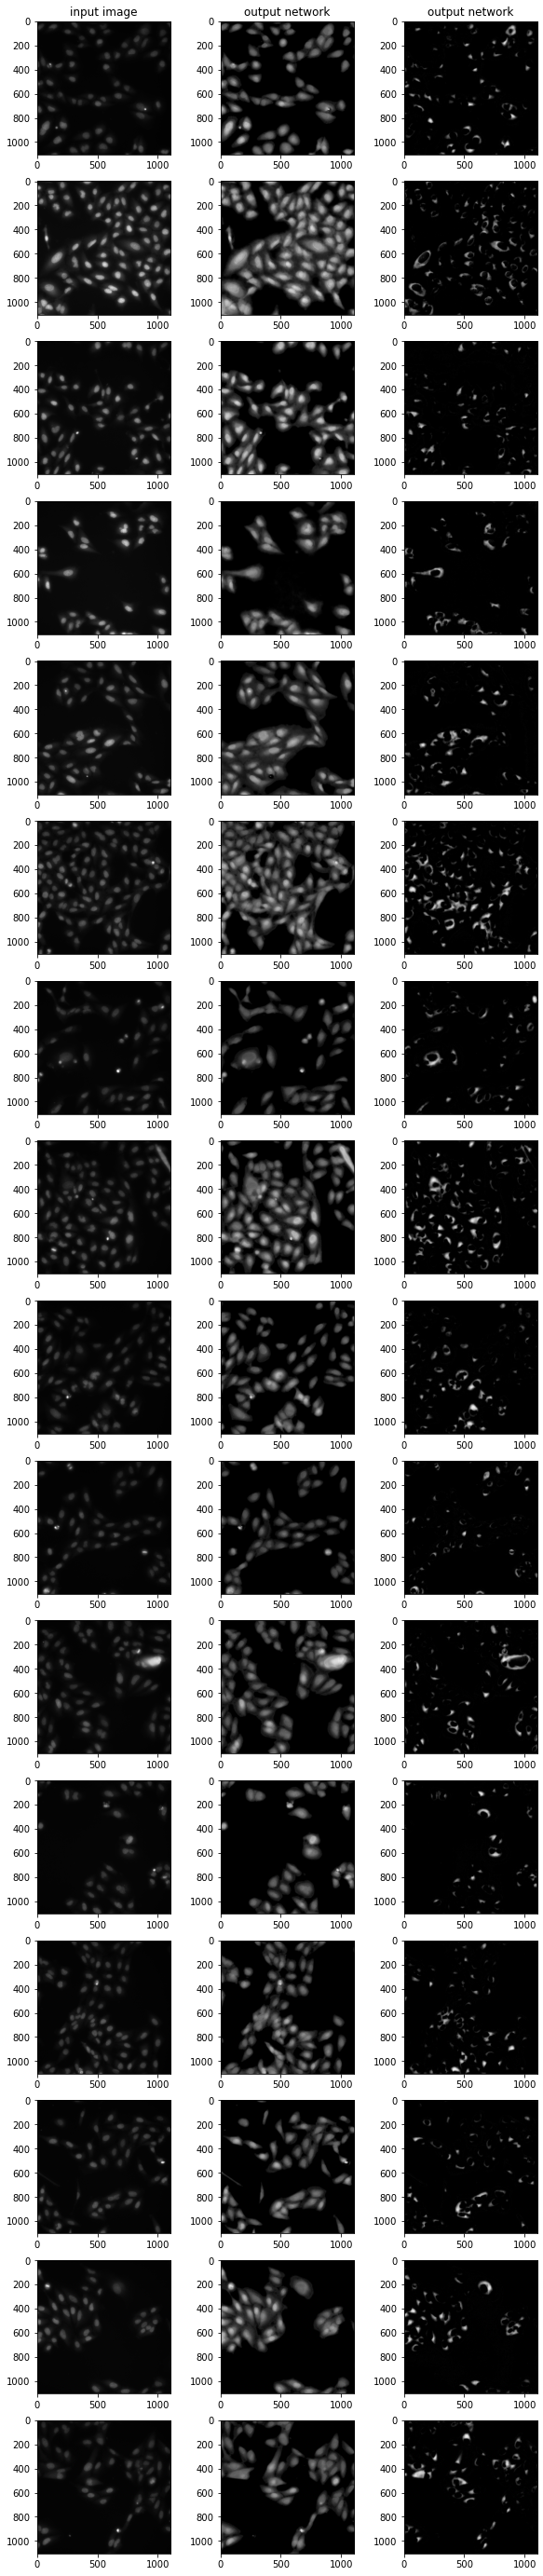

In [73]:
# plot predicted images
plt.figure(figsize=(10,50)) 
n = out.shape[0]
for p in range(n):
    plt.subplot(n,3,1+3*p)    
    plt.imshow(d0_stack[p], cmap='gray')
    if p == 0:
        plt.title('input image')

    plt.subplot(n,3,2+3*p)    
    plt.imshow(out[p,:,:,0], cmap='gray')
    if p == 0:
        plt.title('output network')
    
    plt.subplot(n,3,3+3*p)    
    plt.imshow(out[p,:,:,1], cmap='gray')
    if p == 0:
        plt.title('output network')

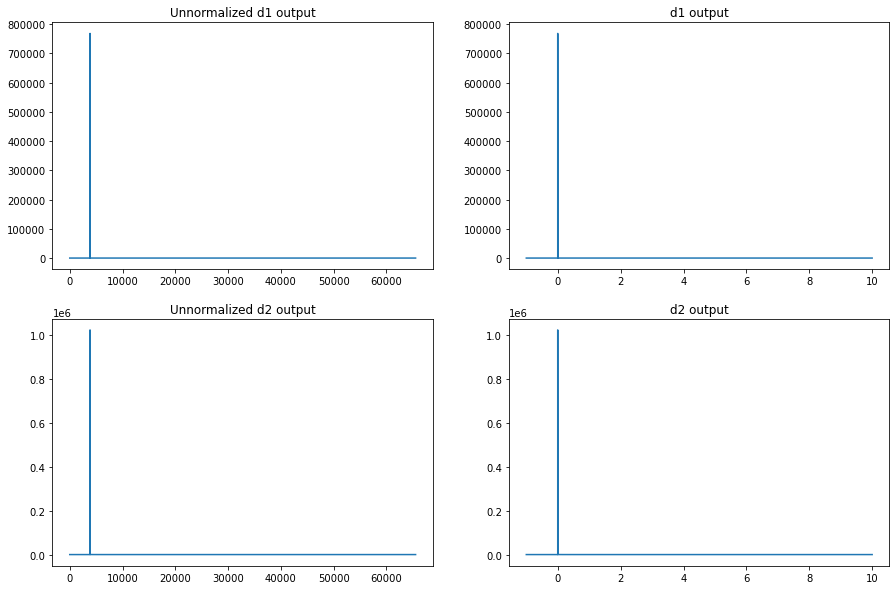

In [67]:
# plot histogram of converted image
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
histogram, bin_edges = np.histogram(output_norm[:,:,0], bins=65535, range=(0,65535))
plt.plot(bin_edges[0:-1], histogram)  
plt.title("Unnormalized d1 output")

plt.subplot(2,2,2)
histogram, bin_edges = np.histogram(output[:,:,0], bins=65535, range=(-1,10))
plt.plot(bin_edges[0:-1], histogram)  
plt.title("d1 output")

plt.subplot(2,2,3)
histogram, bin_edges = np.histogram(output_norm[:,:,1], bins=65535, range=(0,65535))
plt.plot(bin_edges[0:-1], histogram)  
plt.title("Unnormalized d2 output")

plt.subplot(2,2,4)
histogram, bin_edges = np.histogram(output[:,:,1], bins=65535, range=(-1,10))
plt.plot(bin_edges[0:-1], histogram)  
plt.title("d2 output")

plt.savefig()
plt.show()